# 1. Clone the repo

In [1]:
# Clone the entire repo.
!git clone -b data-inspecting --single-branch https://github.com/NewLuminous/Zalo-Vietnamese-Wiki-QA.git zaloqa
%cd zaloqa
!ls

Cloning into 'zaloqa'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 2), reused 16 (delta 2), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/zaloqa
data  LICENSE  README.md


# 2. Load data

In [3]:
from utils.data_loading import ZaloLoader

zalo_loader = ZaloLoader()
zalo_data = zalo_loader.read_json("data/zaloai/train.json")
zalo_data

,id,question,title,text,label
0,u7-1570446247_1,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,u7-1570446247_2,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,u7-1570446247_0,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,u7-1570446247_3,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,u7-1570445661_0,Mỗi hiệp bóng đá kéo dài bao lâu,Bóng đá,Một trận đấu bóng đá thông thường có hai hiệp ...,True
...,...,...,...,...,...
18103,u6-1551268099_0,Thành phố nào là thủ đô của Costa Rica,"San José, Costa Rica",San José (tiếng Tây Ban Nha: San José; ) là th...,True
18104,u6-1551268099_1,Thành phố nào là thủ đô của Costa Rica,Costa Rica,Vì Costa Rica có địa hình đa dạng nhiều núi no...,True
18105,u6-1551268099_2,Thành phố nào là thủ đô của Costa Rica,"San José, Costa Rica","Với địa vị là thủ đô, San José là nơi đặt trụ ...",True
18106,u6-1551268099_4,Thành phố nào là thủ đô của Costa Rica,"Santa Teresa, Costa Rica",Santa Teresa là một thị xã nhỏ ở tỉnh Puntaren...,True


# 3. Inspect data

In [17]:
# No missing data
zalo_data.isna().sum()

id          0
question    0
title       0
text        0
label       0
dtype: int64

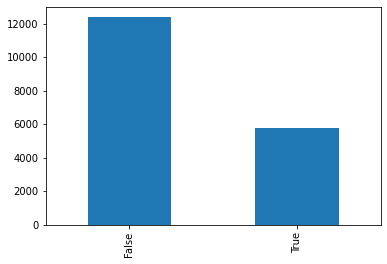

In [4]:
# There are more wrong answers than the right ones
zalo_data['label'].value_counts().plot(kind='bar')

In [8]:
# Numbers of questions
zalo_data['question'].value_counts()

Quê hương của tổng thống Obama ở đâu                 22
phó bí thư thành ủy của Hà Nội là ai                 20
Chiến tranh Việt Nam bắt đầu năm nào                 15
Obama đắc cử vào Thượng viện Hoa Kỳ năm nào          14
Hàn Quốc còn có những tên gọi nào                    14
                                                     ..
Isaac Newton Jr là ai                                 1
Hàn Mạc Tử là ai                                      1
Tên thật của Lê Thái Tổ là gì                         1
ai là người đầu tiên khám phá ra mặt trăng            1
Ngọn núi nào được mệnh danh là Nóc nhà Đông Dương     1
Name: question, Length: 5070, dtype: int64

In [34]:
# Number of titles
zalo_data['title'].value_counts()

                                        995
Việt Nam                                 67
Vịnh Hạ Long                             55
Ngày Bác Hồ ra đi tìm đường cứu nước     43
Hàn Quốc                                 40
                                       ... 
Haruno Sakura                             1
An Lão (thị trấn thuộc Bình Định)         1
Hậu Bổn                                   1
Đại hội Giới trẻ Thế giới 2011            1
Quân đội Hoa Kỳ                           1
Name: title, Length: 9457, dtype: int64

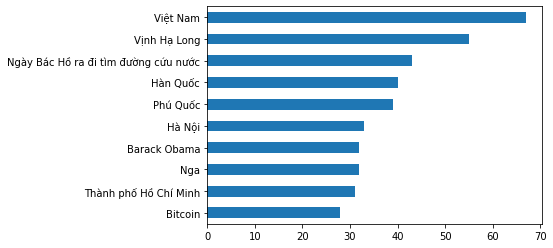

In [37]:
# Top 10 popular titles excluding the empty one
zalo_data['title'].value_counts()[1:11].plot(kind='barh').invert_yaxis()

In [38]:
# Cases with empty title
zalo_data.query('title == ""')

,id,question,title,text,label
22,u5-1570381939_0,Đế quốc Mông Cổ tồn tại khoảng thời gian nào,,Đế quốc Mông Cổ (tiếng Mông Cổ: Монголын эзэнт...,True
37,u5-1570381734_0,Bangladesh có diện tích đứng thứ mấy thế giới,,Dân số Bangladesh xếp hạng thứ bảy trên thế gi...,True
43,u5-1570381646_0,Tôn Trung Sơn là ai,,"Tôn Trung Sơn, nguyên danh là Tôn Văn, tự Tải ...",True
55,u5-1570381394_0,Iran nằm ở khu vực nào,,Iran (tiếng Ba Tư: ایران‎ Irān [ʔiːˈɾɒːn] (ngh...,True
85,u5-1570380924_0,Giáo hoàng là ai,,"Giáo hoàng là vị giám mục của Giáo phận Rôma, ...",True
...,...,...,...,...,...
13053,u3-1557223614_0,Ở thủ đô Hà Nội có tất cả bao nhiêu Quận,,Sau đợt mở rộng địa giới hành chính vào tháng ...,True
13058,u8-1557223614_0,Việt Nam hiện tại có bao nhiêu tỉnh và thành phố,,Việt Nam có 63 tỉnh thành phố trực thuộc Trung...,True
13061,u3-1557223454_0,Một ván cờ vua mỗi bên có bao nhiêu quân,,"Cờ vua (tên tiếng Anh: Chess), trước kia còn đ...",True
13091,u8-1557222362_0,Cách mạng tháng 10 Nga diễn ra vào năm nào,,Cách mạng Tháng Mười nổ ra vào ngày 24 tháng 1...,True
